# Raport z analizy danych

Rozwój supermarketów w najbardziej zaludnionych miastach rośnie, a konkurencja na rynku jest również wysoka. Zbiór danych to jedna z historycznych sprzedaży firmy supermarketów, która została zarejestrowana w 3 różnych oddziałach przez 3 miesiące. 

## Biblioteki

Do analizy wykorzystane zostaną popularne biblioteki stosowane w dziedzinie danych:
- `Pandas`, zbiór narzędzi do analizy danych,
- `Matplotlib` oraz `Seaborn` do wizualizacji danych,

In [2]:
import math
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Konfiguracja

Ustawienia bibliotek i reużywalne stałe wartości

In [3]:
from typing import List

# Set theme to "whitegrid"
# Applies both to Matplotlib and Seaborn (Seaborn internally uses matplotlib)
sns.set_style("whitegrid")

PLOT_COLORS: List[str] = ['#6247aa', '#7251b5', '#815ac0', '#9163cb', '#a06cd5', '#b185db']

def get_color(i: int) -> str:
    return PLOT_COLORS[i % len(PLOT_COLORS)]

# Zbiór danych

In [4]:
df = pd.read_csv("../data/biedronki.csv")
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


Zbiór danych zawiera 1000 wierszy i 17 kolumn - 7 kolumn numerycznych i 10 kolumn kategorycznych (w tym jedna kolumna z unikatowym ID i dwie kolumny reprezentujące czas).

| Kolumna | Opis |
| --- | --- |
| Invoice id | Numer identyfikacyjny faktury sprzedaży wygenerowany komputerowo |
| Branch | Oddział supercentrum (dostępne są 3 oddziały oznaczone literami A, B i C). |
| City | Lokalizacja supercentrów |
| Customer type | Typ klientów, zarejestrowany przez członków dla klientów korzystających z karty członkowskiej i normalny dla klientów bez karty członkowskiej. |
| Gender | Płeć klienta |
| Product line | Ogólne grupy kategoryzacji przedmiotów - Akcesoria elektroniczne, Akcesoria modowe, Żywność i napoje, Zdrowie i uroda, Dom i styl życia, Sport i podróże |
| Unit price | Cena każdego produktu w $ |
| Quantity | Liczba produktów zakupionych przez klienta |
| Tax | Opłata podatkowa w wysokości 5% dla klienta dokonującego zakupu |
| Total | Cena całkowita z podatkiem |
| Date | Data zakupu (rekord dostępny od stycznia 2019 r. do marca 2019 r.) |
| Time | Czas zakupu (od 10:00 do 21:00) |
| Payment | Płatność wykorzystana przez klienta do zakupu (dostępne są 3 metody - gotówka, karta kredytowa i portfel elektroniczny) |
| COGS | Koszt sprzedanych towarów |
| Gross margin percentage | Procentowa marża brutto |
| Gross income | Dochód brutto |
| Rating | Ocena stratyfikacji klientów dotycząca ich ogólnego doświadczenia zakupowego (w skali od 1 do 10) |

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

Niezwykle ważny do podkreślenia jest fakt, że analizowany zbiór danych **nie zawiera** brakujących wartości.

Z kolumn `Date` i `Time` można utworzyć jedną, lepiej interpretowalną kolumnę `Datetime`

In [6]:
df['Datetime'] = pd.to_datetime(df['Date'] + " " + df['Time'])

## Dane numeryczne

Statystyki opisowe danych numerycznych

In [7]:
df.describe(include=['float64', 'int64'])

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


## Dane kategoryczne

Statystyki opisowe danych kategorycznych

In [8]:
df.drop(['Date', 'Time'], axis=1).describe(include=object)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Payment
count,1000,1000,1000,1000,1000,1000,1000
unique,1000,3,3,2,2,6,3
top,750-67-8428,A,Yangon,Member,Female,Fashion accessories,Ewallet
freq,1,340,340,501,501,178,345


In [9]:
df['Customer type'].value_counts()

Customer type
Member    501
Normal    499
Name: count, dtype: int64

In [10]:
df['Product line'].value_counts()

Product line
Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: count, dtype: int64

In [11]:
df['Payment'].value_counts()

Payment
Ewallet        345
Cash           344
Credit card    311
Name: count, dtype: int64

## Rozkłady danych numerycznych

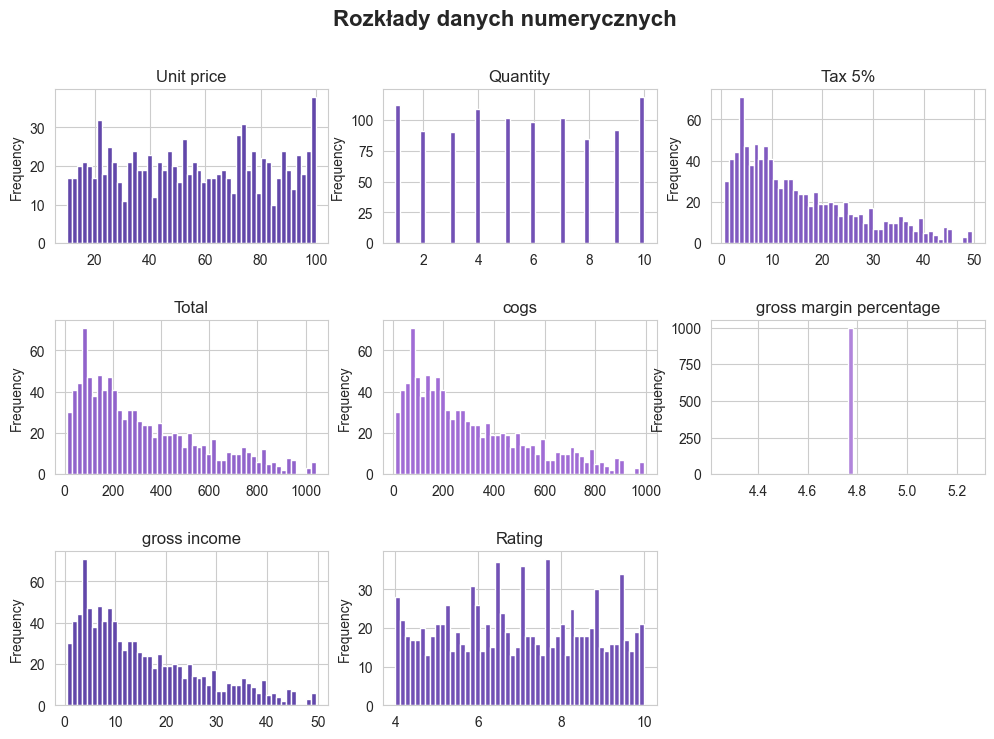

In [12]:
# Define subset df
df_numeric = df.select_dtypes(include=['float64', 'int64'])

fig, ax = plt.subplots(nrows=math.ceil(len(df_numeric.columns) / 3), ncols=3, figsize=(12, 8))

# Increase space between rows
fig.subplots_adjust(hspace=0.5)

# Title
fig.suptitle("Rozkłady danych numerycznych", fontsize=16, fontweight='bold')

for i, feature in enumerate(
    df.select_dtypes(include=['float64', 'int64'])
):
    ax_curr = ax[int(i / 3)][i % 3]
    df[feature].plot(kind="hist", ax=ax_curr, color=get_color(i), bins=50).set_title(feature)

# Remove empty subplot
fig.delaxes(ax[2][2])

## Rozkłady danych kategorycznych

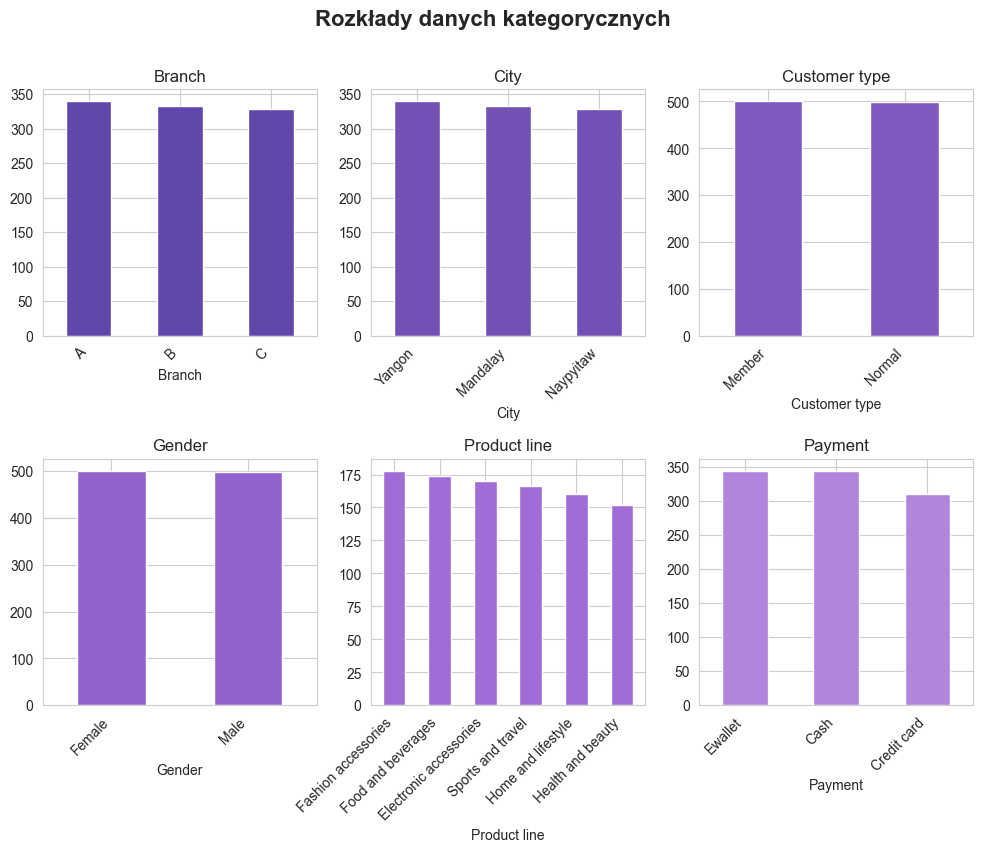

In [13]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))

# Increase space between rows
fig.subplots_adjust(hspace=0.5)

# Title
fig.suptitle("Rozkłady danych kategorycznych", fontsize=16, fontweight='bold')

for i, feature in enumerate(
    df[
        [
            "Branch",
            "City",
            "Customer type",
            "Gender",
            "Product line",
            "Payment",
        ]
    ]
):
    ax_curr = ax[int(i / 3)][i % 3]
    df[feature].value_counts().plot(kind="bar", ax=ax_curr, color=get_color(i)).set_title(feature)

    # Rotate x-labels to 45 degrees and set ha to right
    for label in ax_curr.get_xticklabels():
        label.set_rotation(45)
        label.set_ha('right')



Gross income dla kobiet jest większy niż dla mężczyzn

Gross income nie różni się dla różnych kategorii zadowolenia

ANOVA wieloczynnikowa

Text(0.5, 1.0, 'Całkowity przychód z podziałem na godziny')

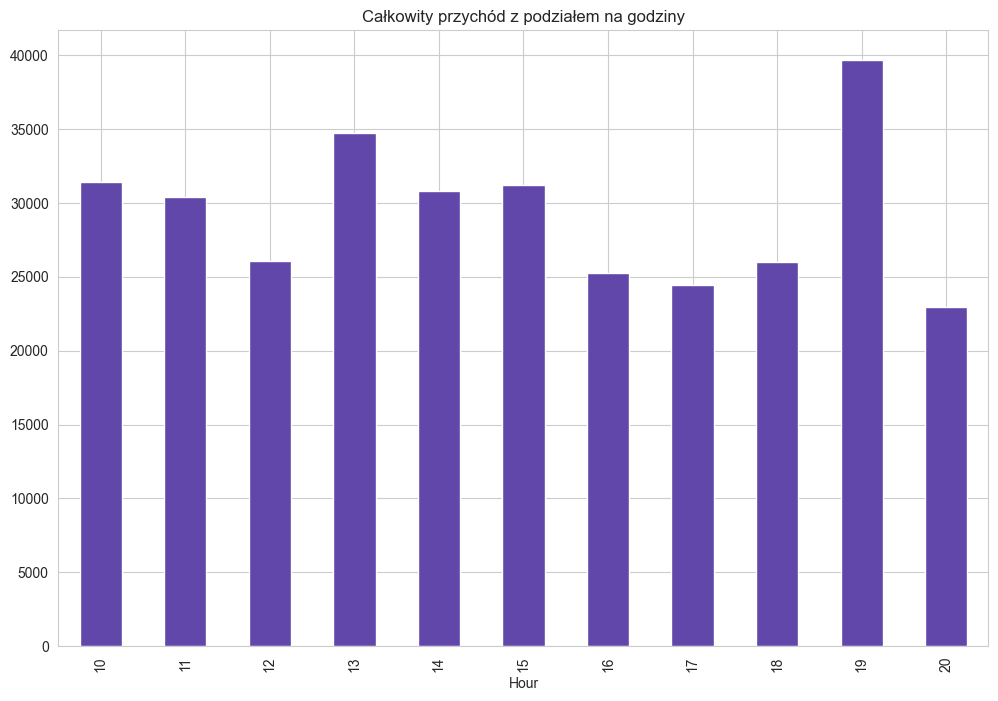

In [20]:
# Całkowity przychód z podziałem na godziny - wykres

df['Hour'] = df['Datetime'].dt.hour

df.groupby('Hour')['Total'].sum().plot(kind='bar', figsize=(12, 8), color=get_color(0)).set_title("Całkowity przychód z podziałem na godziny")

Text(0.5, 1.0, 'Liczba odwiedzin w danej godzinie')

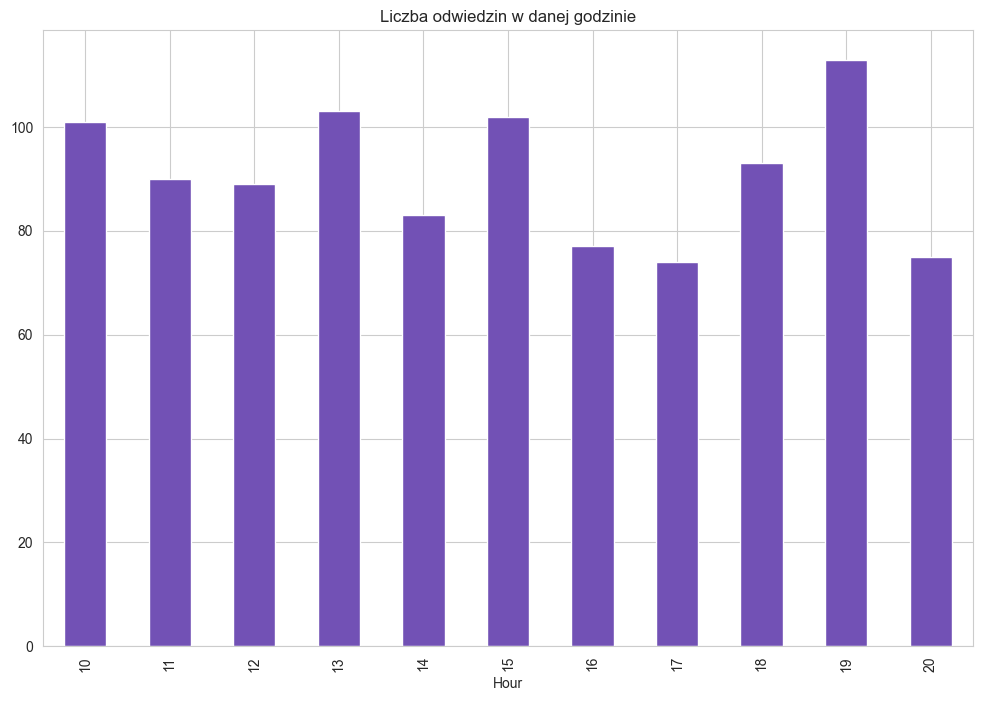

In [21]:
# Liczba odwiedzin w danej godzinie - wykres

df.groupby('Hour')['Invoice ID'].count().plot(kind='bar', figsize=(12, 8), color=get_color(1)).set_title("Liczba odwiedzin w danej godzinie")

Test na normalność rozkładu

- Test Shapiro-Wilk

Text(0.5, 1.0, 'Ile produktów danej kategorii sprzedano w danej godzinie')

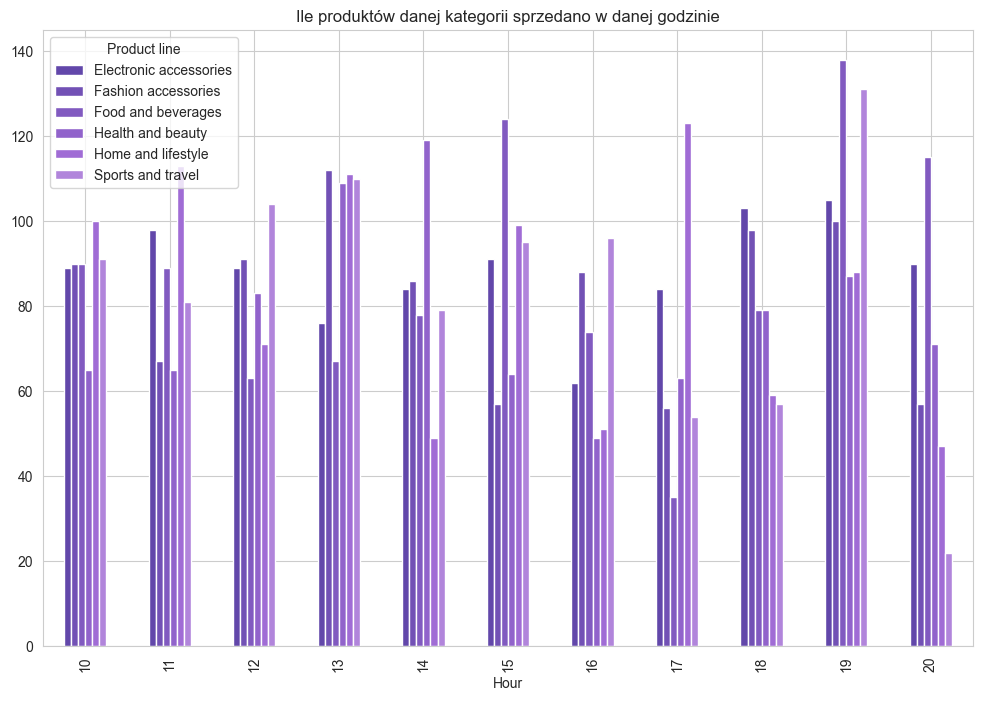

In [22]:
# Ile produktów danej kategorii sprzedano w danej godzinie - wykres

df.groupby(['Hour', 'Product line'])['Quantity'].sum().unstack().plot(kind='bar', figsize=(12, 8), color=PLOT_COLORS).set_title("Ile produktów danej kategorii sprzedano w danej godzinie")